**1.Допустим, у вас есть файл с данными, который называется ‘iris.
csv’. Этот файл находится в папке ‘/data/’. Вы открываете его
в текстовом редакторе и видите следующие первые строки: sepal length in cm; sepal width in cm; petal length in
cm; petal width in cm; class
5.1; 3.5; 1.4; 0.2; 0**

**Как должна выглядеть команда для считывания данных в датафрейм Pandas?**

In [ ]:
import pandas as pd

df = pd.read_csv('/data/iris.csv', sep=';', header=0)

**2.Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсорти- руйте полученный датафрейм по колонке ‘Distance’ по убы- ванию. Какое значение колонки ‘Style’ у полученного датаф- рейма во второй строке сверху?**

In [5]:
import pandas as pd

df = pd.read_csv('./cars.csv')

# Удаление дубликатов
df = df.drop_duplicates()

df_selected = df.iloc[69:323]

df_sorted = df_selected.sort_values(by='Distance', ascending=False)

second_style_value = df_sorted.iloc[1]['Style']

second_style_value

'Minivan'

**3.Для набора данных Cars оцените количество строк, которые были удалены после анализа гистограмм распределения и удаления аномальных значений.**

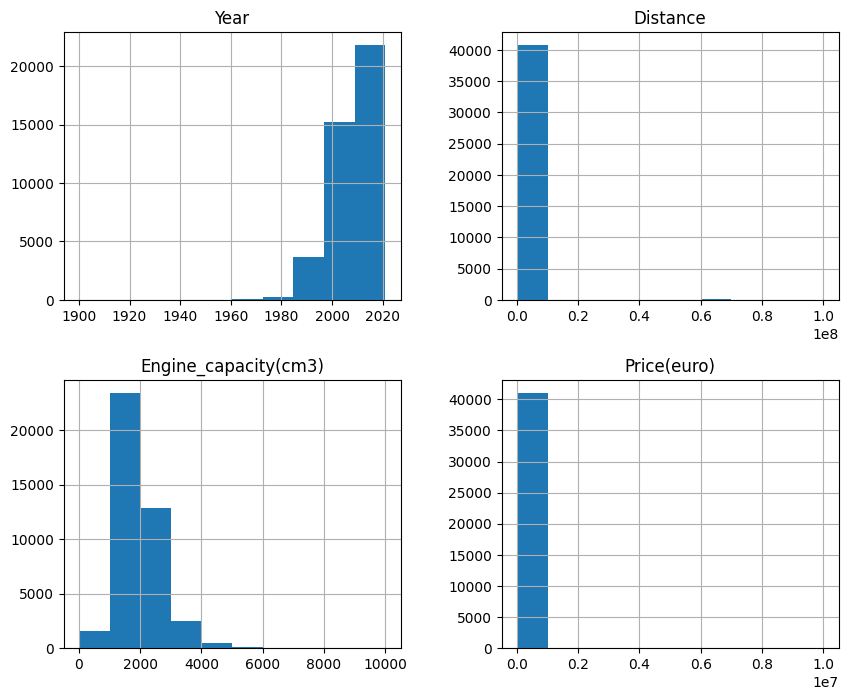

Удаленных строк 1242


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./cars.csv')

# Количество строк до удаления аномальных значений
initial_count = len(df)

# Гистограммы
df.hist(figsize=(10, 8))
plt.show()

# Пример удаления аномалий: выбросы по значению 'Distance', выберем строки, где 'Distance' находится в разумных пределах
# Предположим, что мы считаем аномальными значения выше 99-го перцентиля и ниже 1-го перцентиля
q_low = df['Distance'].quantile(0.01)
q_high = df['Distance'].quantile(0.99)

# Удаление аномальных значений
df_cleaned = df[(df['Distance'] > q_low) & (df['Distance'] < q_high)]

# Количество строк после удаления аномальных значений
final_count = len(df_cleaned)

removed_rows = initial_count - final_count

print(f"Удаленных строк {removed_rows}")

**4.Для набора данных Cars назовите самую распространенную марку автомобилей (столбец Make).**

In [9]:
import pandas as pd

df = pd.read_csv('cars.csv')

most_common_make = df['Make'].value_counts().idxmax()

most_common_make

'Volkswagen'

**5.Визуализируйте скаттерограмму для двух столбцов — Distance и Year — набора данных Cars с использованием столбца Transmission в качестве цвета маркера (hue). К какому типу Transmission относится точка, которая наиболее близка к ко- ординатам (Year = 1980, Distance = 500 000)?**

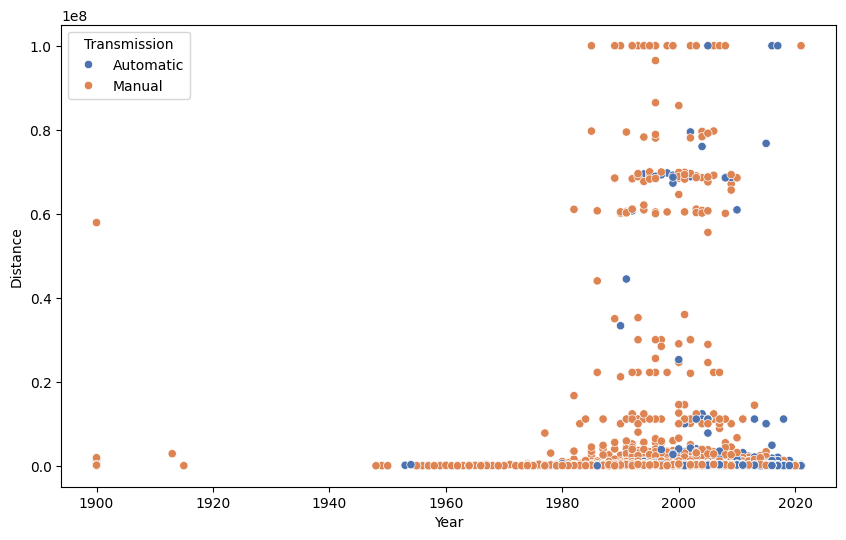

'Automatic'

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных
df = pd.read_csv('cars.csv')

# Построение скаттерограммы
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='Distance', hue='Transmission', data=df, palette='deep')
plt.show()

# Поиск точки, ближайшей к (Year = 1980, Distance = 500000)
target_year = 1980
target_distance = 500000

# Рассчитываем расстояние до каждой точки
df['distance_to_target'] = np.sqrt((df['Year'] - target_year)**2 + (df['Distance'] - target_distance)**2)

# Находим индекс строки с минимальным расстоянием
closest_point_index = df['distance_to_target'].idxmin()

# Находим значение Transmission для этой точки
closest_transmission = df.loc[closest_point_index, 'Transmission']

# Вывод значения Transmission для ближайшей точки
closest_transmission

Transmission относится к типу 'Automatic'

**6.Представим, что вы визуализировали некий набор данных Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все красные точки от всех синих точек с помощью прямой линии?**

1)Преобразование координат: создать полиномиальные признаки (второго или более высоких порядков) для существующих данных. Это позволит линии (гиперплоскости) разделить точки в новом пространстве. Примеры новых признаков: x^2, y^2, xy.

2)Логарифмические или экспоненциальные признаки: если данные имеют нелинейное распределение, можно добавить логарифмы или экспоненты существующих признаков, чтобы лучше разделить группы.